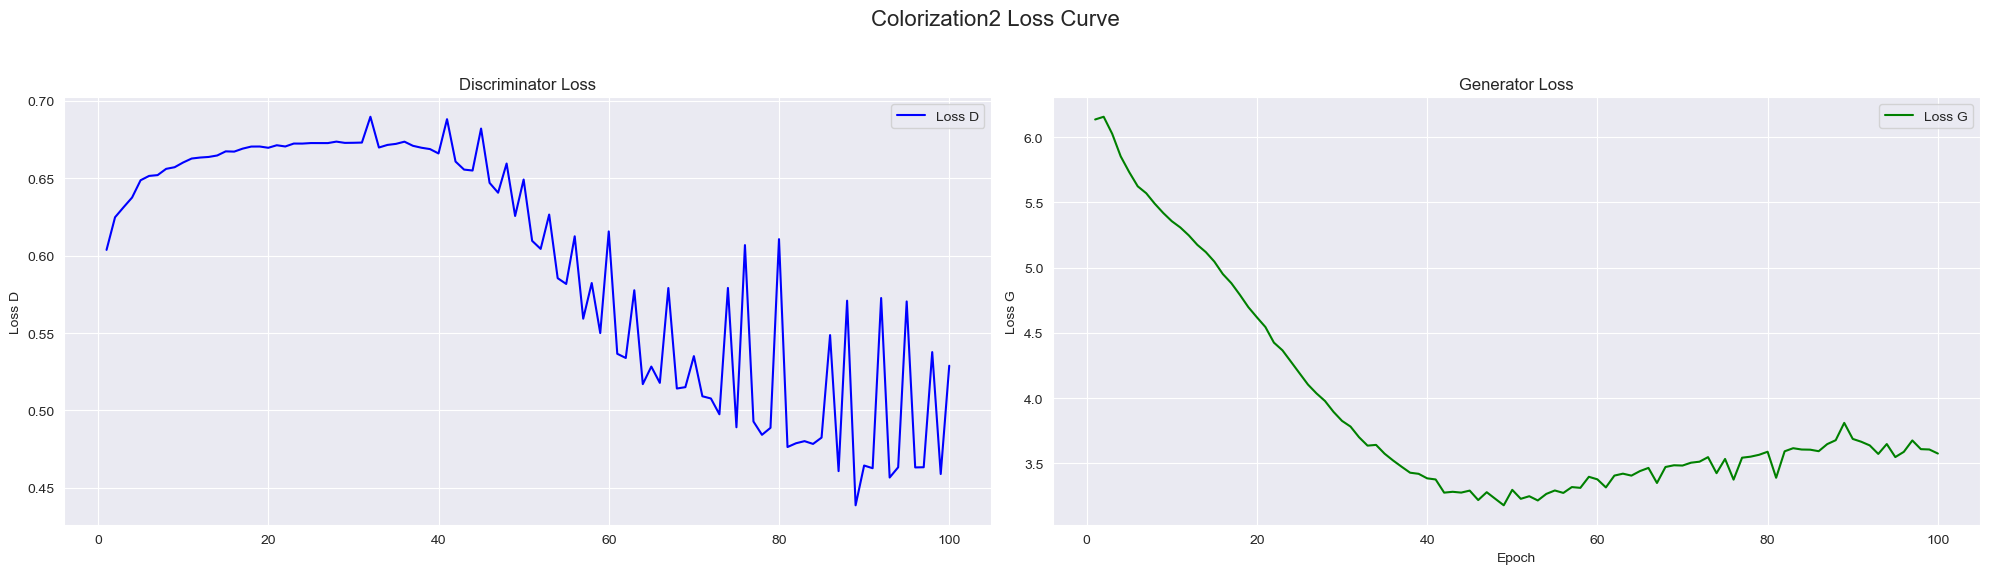

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

epochs = []
loss_D = []
loss_G = []

log_file = './Colorization2.log'

with open(log_file, 'r', encoding='utf-8') as f:
    for line in f:
        match = re.search(
            r'Epoch (\d+) - loss_D_fake: ([\d.]+), loss_D_real: ([\d.]+), loss_D: ([\d.]+), loss_G_GAN: ([\d.]+), loss_G_L1: ([\d.]+), loss_G: ([\d.]+)',
            line
        )
        if match:
            epoch = int(match.group(1))
            loss_d = float(match.group(4))
            loss_g = float(match.group(7))
            epochs.append(epoch)
            loss_D.append(loss_d)
            loss_G.append(loss_g)

df = pd.DataFrame({
    'Epoch': epochs,
    'Loss_D': loss_D,
    'Loss_G': loss_G
})

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
fig.suptitle('Colorization2 Loss Curve', fontsize=16)

axes[0].plot(df['Epoch'], df['Loss_D'], label='Loss D', color='blue')
axes[0].set_ylabel('Loss D')
axes[0].set_title('Discriminator Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df['Epoch'], df['Loss_G'], label='Loss G', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss G')
axes[1].set_title('Generator Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

output_file = './Colorization2_Loss_Curve.png'
plt.savefig(output_file, dpi=500)

plt.show()